In [25]:
import pandas as pd
import numpy as np
import scipy.stats

In [24]:
!pip install scipy

     ---------------------------------------- 40.1/40.1 MB 4.2 MB/s eta 0:00:00


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
academy_landing=pd.read_csv('academy.csv')

In [4]:
academy_landing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8095 entries, 0 to 8094
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           8095 non-null   int64  
 1   index                8095 non-null   int64  
 2   ga:country           8095 non-null   object 
 3   ga:pagePath          8095 non-null   object 
 4   ga:landingPagePath   8095 non-null   object 
 5   ga:secondPagePath    8095 non-null   object 
 6   ga:exitPagePath      8095 non-null   object 
 7   ga:previousPagePath  8095 non-null   object 
 8   ga:pageviews         8095 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 569.3+ KB


In [44]:
ac=pd.DataFrame(academy_landing.groupby(['ga:country','ga:landingPagePath','ga:exitPagePath'])['ga:pageviews'].sum()).sort_values(by='ga:pageviews', ascending=False).reset_index()
ac

,ga:country,ga:landingPagePath,ga:exitPagePath,ga:pageviews
0,Armenia,academy.asodesk.com/what-is-aso,academy.asodesk.com/what-is-aso,2363.0
1,Belarus,academy.asodesk.com/aso-course,academy.asodesk.com/aso-course,2055.0
2,Belarus,academy.asodesk.com/what-is-aso,academy.asodesk.com/what-is-aso,1960.0
3,Ukraine,academy.asodesk.com/aso-course,academy.asodesk.com/aso-course,1344.0
4,Russia,academy.asodesk.com/,academy.asodesk.com/aso-course,679.0
...,...,...,...,...
474,Germany,academy.asodesk.com/how-to-become-aso-manager,academy.asodesk.com/aso-course,1.0
475,Belarus,academy.asodesk.com/,ru.asodesk.com/blog/intensive-on-influence-mar...,1.0
476,Germany,academy.asodesk.com/en,academy.asodesk.com/en,1.0
477,Germany,academy.asodesk.com/aso-course,ru.asodesk.com/blog/page/2/,1.0


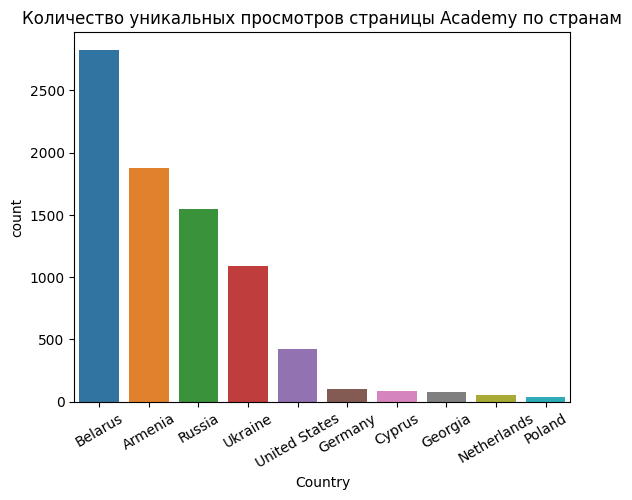

In [6]:
fig = plt.figure()
#ax = fig.add_subplot(111)
ax=sns.countplot(data=academy_landing, x="ga:country",order = academy_landing['ga:country'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set(title='Количество уникальных просмотров страницы Academy по странам')
ax.set_xlabel("Country")


plt.show()

In [32]:
acc=pd.DataFrame(academy_landing.groupby(['ga:country'])['ga:pageviews'].sum()).sort_values(by='ga:pageviews', ascending=False).rename(columns={'ga:pageviews':'sum_pageviews'})
acc

,sum_pageviews
ga:country,
Belarus,7490.0
Russia,3479.0
Armenia,2809.0
Ukraine,2447.0
United States,698.0
Georgia,499.0
Germany,368.0
Poland,280.0
Cyprus,186.0


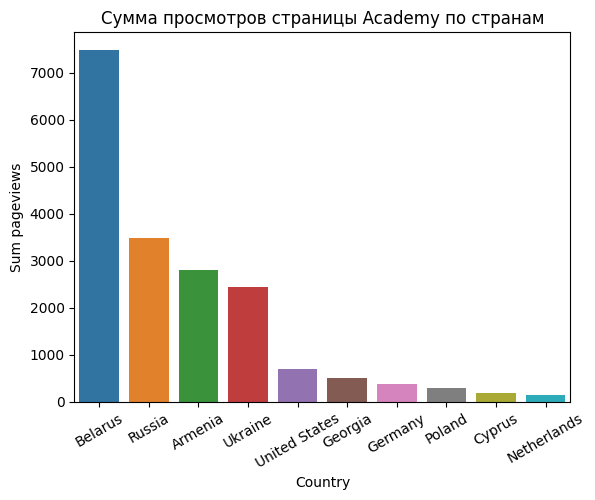

In [47]:
fig = plt.figure()

ax=sns.barplot(data=acc.reset_index(), x="ga:country",y="sum_pageviews")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set(title='Сумма просмотров страницы Academy по странам')
ax.set_xlabel("Country")
ax.set_ylabel('Sum pageviews')

plt.show()

In [31]:
Statistics_a=pd.DataFrame(academy_landing.groupby(['ga:country'])['ga:pageviews'].count()).sort_values(by='ga:pageviews', ascending=False).rename(columns={'ga:pageviews':'count_pageviews'})
mean=pd.DataFrame(academy_landing.groupby(['ga:country'])['ga:pageviews'].mean()).sort_values(by='ga:pageviews', ascending=False).rename(columns={'ga:pageviews':'mean_pageviews'})

In [33]:
Statistics_a=pd.concat([Statistics_a,acc,mean],axis=1)
Statistics_a

,count_pageviews,sum_pageviews,mean_pageviews
ga:country,,,
Belarus,2828,7490.0,2.648515
Armenia,1873,2809.0,1.499733
Russia,1545,3479.0,2.251780
Ukraine,1086,2447.0,2.253223
United States,419,698.0,1.665871
Germany,100,368.0,3.680000
Cyprus,82,186.0,2.268293
Georgia,75,499.0,6.653333
Netherlands,50,132.0,2.640000


In [34]:
scipy.stats.pearsonr(Statistics_a['sum_pageviews'], Statistics_a['mean_pageviews'])

PearsonRResult(statistic=-0.33475228393855067, pvalue=0.3444169831188778)

In [35]:
scipy.stats.spearmanr(Statistics_a['sum_pageviews'], Statistics_a['mean_pageviews'])

SpearmanrResult(correlation=-0.41818181818181815, pvalue=0.22911284098281892)

In [36]:
scipy.stats.kendalltau(Statistics_a['sum_pageviews'], Statistics_a['mean_pageviews'])

KendalltauResult(correlation=-0.28888888888888886, pvalue=0.2912483465608466)

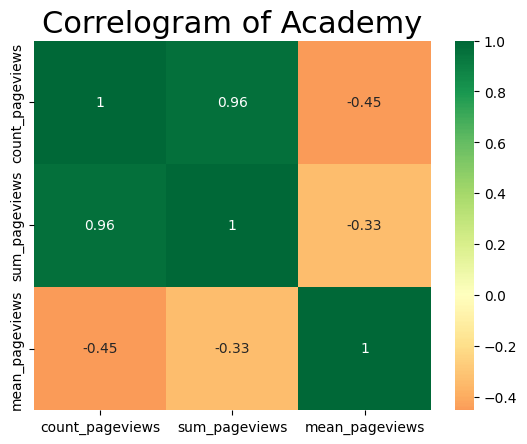

In [42]:
sns.heatmap(Statistics_a.corr(), xticklabels=Statistics_a.corr().columns, yticklabels=Statistics_a.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlogram of Academy', fontsize=22);

In [49]:
academy_landing=academy_landing.drop(columns='Unnamed: 0')
academy_landing

,index,ga:country,ga:pagePath,ga:landingPagePath,ga:secondPagePath,ga:exitPagePath,ga:previousPagePath,ga:pageviews
0,495595,United States,academy-asodesk-com.translate.goog/,academy-asodesk-com.translate.goog/,(not set),academy-asodesk-com.translate.goog/,(entrance),1.0
1,495596,United States,academy-asodesk-com.translate.goog/aso-course,academy-asodesk-com.translate.goog/aso-course,(not set),academy-asodesk-com.translate.goog/aso-course,(entrance),4.0
2,241963,Russia,asodesk.com/blog/,academy.asodesk.com/,academy.asodesk.com/,asodesk.com/blog/how-to-choose-countries-for-p...,asodesk.com/,1.0
3,459021,Ukraine,academy.asodesk.com/,academy.asodesk.com/,ru.asodesk.com/,academy.asodesk.com/,ru.asodesk.com/,1.0
4,459022,Ukraine,academy.asodesk.com/,academy.asodesk.com/,ru.asodesk.com/,ru.asodesk.com/,(entrance),3.0
...,...,...,...,...,...,...,...,...
8090,4925,Belarus,academy.asodesk.com/what-is-aso,academy.asodesk.com/what-is-aso,(not set),academy.asodesk.com/what-is-aso,(entrance),1.0
8091,4837,Belarus,academy.asodesk.com/what-is-aso,academy.asodesk.com/what-is-aso,(not set),academy.asodesk.com/what-is-aso,(entrance),1.0
8092,4838,Belarus,academy.asodesk.com/what-is-aso,academy.asodesk.com/what-is-aso,(not set),academy.asodesk.com/what-is-aso,(entrance),1.0
8093,4890,Belarus,academy.asodesk.com/what-is-aso,academy.asodesk.com/what-is-aso,(not set),academy.asodesk.com/what-is-aso,(entrance),1.0


In [135]:
landing_page=pd.DataFrame(academy_landing.groupby(['ga:landingPagePath','ga:exitPagePath'])['ga:pageviews'].count()).sort_values(by='ga:pageviews', ascending=False).rename(columns={'ga:pageviews':'landing_pageviews'}).reset_index()
landing_page

,ga:landingPagePath,ga:exitPagePath,landing_pageviews
0,academy.asodesk.com/what-is-aso,academy.asodesk.com/what-is-aso,2425
1,academy.asodesk.com/aso-course,academy.asodesk.com/aso-course,1880
2,academy.asodesk.com/reviews-course,academy.asodesk.com/reviews-course,237
3,academy.asodesk.com/aso-course,hq.asodesk.com/settings/pricing,161
4,academy.asodesk.com/,academy.asodesk.com/aso-course,158
...,...,...,...
298,academy.asodesk.com/aso-course,ru.asodesk.com/mobile-app-marketing-trends-in-...,1
299,academy.asodesk.com/how-to-become-aso-manager,academy.asodesk.com/aso-course,1
300,academy.asodesk.com/page26627559.html,academy.asodesk.com/page26627559.html,1
301,academy.asodesk.com/reviews-course,asodesk.com/blog/5-ways-to-deal-with-negative-...,1


In [121]:
land=pd.DataFrame(academy_landing.groupby(['ga:landingPagePath'])['ga:pageviews'].sum()).sort_values(by='ga:pageviews', ascending=False).rename(columns={'ga:pageviews':'sum_pageviews'}).reset_index().head(4)
land

,ga:landingPagePath,sum_pageviews
0,academy.asodesk.com/aso-course,7552.0
1,academy.asodesk.com/what-is-aso,5195.0
2,academy.asodesk.com/,4179.0
3,academy.asodesk.com/reviews-course,1031.0


In [204]:
exit_page=pd.DataFrame(academy_landing.groupby(['ga:exitPagePath'])['ga:pageviews'].count()).sort_values(by='ga:pageviews', ascending=False).rename(columns={'ga:pageviews':'exit_pageviews'}).reset_index().head(5)
exit_page

,ga:exitPagePath,exit_pageviews
0,academy.asodesk.com/what-is-aso,2504
1,academy.asodesk.com/aso-course,2080
2,academy.asodesk.com/reviews-course,286
3,hq.asodesk.com/settings/pricing,253
4,hq.asodesk.com/ru/,195


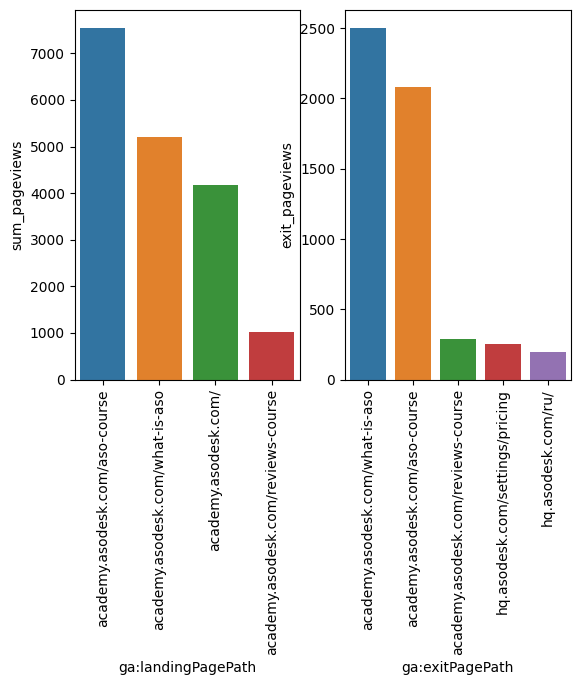

In [238]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False)


sns.barplot(x = 'ga:landingPagePath', y = 'sum_pageviews',
           data = land, ax=ax1)
sns.barplot(x = 'ga:exitPagePath', y = 'exit_pageviews',
           data = exit_page, ax=ax2)

ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)

plt.show()


In [130]:
landing_exit_page=pd.concat([landing_page,exit_page],axis=1).reset_index().rename(columns={'index':'page'}).head(10)

In [131]:
landing_exit_page

,page,landing_pageviews,exit_pageviews
0,academy.asodesk.com/aso-course,3505.0,2080.0
1,academy.asodesk.com/what-is-aso,2555.0,2504.0
2,academy.asodesk.com/,1187.0,130.0
3,academy.asodesk.com/reviews-course,593.0,286.0
4,academy.asodesk.com/reviews-course/reviews-bas...,81.0,53.0
5,academy.asodesk.com/en,52.0,31.0
6,academy.asodesk.com/ru_aso_test,43.0,1.0
7,academy.asodesk.com/aso-basic-principles_lesson_1,28.0,6.0
8,academy.asodesk.com/splitandsearch,19.0,5.0
9,academy.asodesk.com/reviews-course/,6.0,6.0


In [119]:
ex=pd.DataFrame(academy_landing.groupby(['ga:exitPagePath'])['ga:pageviews'].sum()).sort_values(by='ga:pageviews', ascending=False).rename(columns={'ga:pageviews':'sum_pageviews'}).reset_index().head(5)
ex

,ga:exitPagePath,sum_pageviews
0,academy.asodesk.com/aso-course,6421.0
1,academy.asodesk.com/what-is-aso,5152.0
2,academy.asodesk.com/,1319.0
3,academy.asodesk.com/reviews-course,700.0
4,hq.asodesk.com/settings/pricing,484.0


In [122]:
df=academy_landing.loc[academy_landing['ga:landingPagePath'].isin(land['ga:landingPagePath'])]
df

,index,ga:country,ga:pagePath,ga:landingPagePath,ga:secondPagePath,ga:exitPagePath,ga:previousPagePath,ga:pageviews
2,241963,Russia,asodesk.com/blog/,academy.asodesk.com/,academy.asodesk.com/,asodesk.com/blog/how-to-choose-countries-for-p...,asodesk.com/,1.0
3,459021,Ukraine,academy.asodesk.com/,academy.asodesk.com/,ru.asodesk.com/,academy.asodesk.com/,ru.asodesk.com/,1.0
4,459022,Ukraine,academy.asodesk.com/,academy.asodesk.com/,ru.asodesk.com/,ru.asodesk.com/,(entrance),3.0
5,459023,Ukraine,academy.asodesk.com/,academy.asodesk.com/,ru.asodesk.com/,ru.asodesk.com/,academy.asodesk.com/,1.0
6,459024,Ukraine,academy.asodesk.com/,academy.asodesk.com/,ru.asodesk.com/,ru.asodesk.com/,academy.asodesk.com/aso-course,2.0
...,...,...,...,...,...,...,...,...
8090,4925,Belarus,academy.asodesk.com/what-is-aso,academy.asodesk.com/what-is-aso,(not set),academy.asodesk.com/what-is-aso,(entrance),1.0
8091,4837,Belarus,academy.asodesk.com/what-is-aso,academy.asodesk.com/what-is-aso,(not set),academy.asodesk.com/what-is-aso,(entrance),1.0
8092,4838,Belarus,academy.asodesk.com/what-is-aso,academy.asodesk.com/what-is-aso,(not set),academy.asodesk.com/what-is-aso,(entrance),1.0
8093,4890,Belarus,academy.asodesk.com/what-is-aso,academy.asodesk.com/what-is-aso,(not set),academy.asodesk.com/what-is-aso,(entrance),1.0
